# Introduction

Basic graph algotims

### BFS

In [1]:
import numpy as np
import networkx as nx

def BFS(G,start,end):
    
    queue = [start]
    visited = set([])
    while queue:
        print(queue)
        node = queue.pop(0)   #take from top
        if node == end:
            return True
        if node not in visited: 
            visited.add(node)
            new_neighbours = set(dict(G[node]).keys()) - visited
            for n in new_neighbours:
                queue.append(n)
    return False

G = nx.Graph()
edges = [(1,2),(1,3),(3,4),(3,5),(3,6),(1,6)]
G.add_edges_from(edges)
nx.draw(G)

BFS(G,1,5)

[1]
[2, 3, 6]
[3, 6]
[6, 4, 5, 6]
[4, 5, 6]
[5, 6]


True

In [2]:
def shortestPathBFS(G,start,end):
    
    queue = [(start,[start])]  #[ (node,[node1,node2,...]) ]
    visited = set([])
    while queue:
        (node,path) = queue.pop(0)   #take from top
        if node == end:
            return path
        if node not in visited: 
            visited.add(node)
            new_neighbours = set(dict(G[node]).keys()) - visited
            for n in new_neighbours:
                queue.append((n,path+[n]))
    return False

#Make graph
G = nx.Graph()
edges = [(1,2),(1,3),(3,4),(3,5),(3,6),(1,6)]
G.add_edges_from(edges)

path = shortestPathBFS(G,1,5)
path

[1, 3, 5]

### Find all cc's

In [3]:
import networkx as nx

def find_cc(G,start):
    queue = [start]
    visited = set([])
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.add(node)
            neighbours = set(list(G[node].keys()))
            new_neighbours = neighbours - visited
            for n in new_neighbours:
                queue.append(n)
    return visited


def find_all_ccs(G):
    all_nodes = set(list(G.nodes()))
    ccs = []
    while all_nodes:
        start = all_nodes.pop()
        visited = find_cc(G,start)
        ccs.append(list(visited))
        all_nodes = all_nodes - visited
    return ccs
        

N,p = 20, 0.1
G = nx.erdos_renyi_graph(N,p)
ccs = find_all_ccs(G)
ccs

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19], [17]]

### DFS -- recursive

In [8]:
def dfs(G, start, goal, visited):
    if start == goal:
        return True
    else:
        new_visited = visited + [start]
        neighbours = list(G[start])
        for n in neighbours:
            if n not in new_visited:
                return dfs(G, n, goal, new_visited)
    return False


N,p = 20, 0.4
G = nx.erdos_renyi_graph(N,p)
dfs(G,5,10,[])

True

### Topological sort


In a directed acylic graph, every directed edge, (u,v), u comes before v in the ordering. This ordering is not unique. 

See https://stackoverflow.com/questions/47192626/deceptively-simple-implementation-of-topological-sorting-in-python

Below work for starting at one end

In [6]:
def dfs(G,start):
    
    result = [start]
    visited = set([])
    
    def helper(G,start):
        for n in set(G[start]) - visited:
            visited.add(n)
            result.append(n)
            helper(G,n)
            
    helper(G,5)
    return result


def topological_sort(G,start):
    
    result = []
    visited = set([])
    
    def helper(G,start):
        for n in set(G[start]) - visited:
            visited.add(n)
            helper(G,n)
        result.insert(0,start)
        
    helper(G,5)
    return result
                            

G = nx.DiGraph() 
G.add_edge(5, 2); 
G.add_edge(5, 0); 
G.add_edge(4, 0); 
G.add_edge(4, 1); 
G.add_edge(2, 3); 
G.add_edge(3, 1);

topological_sort(G,5)

[5, 2, 3, 1, 0]

In [7]:
def topological_sort(G):
    
    #visited list
    visited = set()
    stack = []
    
    def helper(G,node):
        for n in set(G[node]) - visited:
            visited.add(n)
            helper(G,n)
        stack.insert(0,node)
        
    for node in G.nodes():
        print('node = {}'.format(node))
        if node not in visited:
            helper(G,node)
    
    return stack

G = nx.DiGraph() 
G.add_edge(5, 2); 
G.add_edge(5, 0); 
G.add_edge(4, 0); 
G.add_edge(4, 1); 
G.add_edge(2, 3); 
G.add_edge(3, 1);
topological_sort(G)

node = 5
node = 2
node = 0
node = 4
node = 1
node = 3


[4, 5, 2, 3, 1, 0]

### Detect cycle in undirected graph

## Detect cycle in directed graph

Q -- same for undirected? For undirected, there is a union-find algorithm which is faster

#### Recursive

In [21]:
def isCycle(G):
    recStack = {n:False for n in G.keys()}
    visited = set()
    
    def helper(G,node,visited,recStack):
        visited.add(node)
        recStack[node] = True
        for n in G[node]:
            if n not in visited:
                if helper(G,n,visited,recStack): return True
            elif n in recStack:
                return True
            
        recStack[node] = False
        return False
                
    #main
    for node in G.keys():
        if node not in visited:
            if helper(G,node,visited,recStack):
                return True
            
    return False
    
G = {'a':['b'],'b':['c'],'c':['d'],'d':[]}
isCycle(G)

False

#### Iterative

In [24]:
def isCycle(G):
    visited = set()
    
    def helper(G,node):
        stack = [(node,[node])]
        while stack:
            node, path = stack.pop(-1)
            visited.add(node)
            for n in G[node]:
                if n in path:
                    return True
                if n not in visited:
                    stack.append((n,path+[n]))
        return False
    
    for node in G.keys():
        if node not in visited:
            if helper(G,node):
                return True
    return False

G = {'a':['b'],'b':['c'],'c':['a'],'d':[]}
isCycle(G)

True

### Find articulation points

This one is complicated, see below resources

https://www.geeksforgeeks.org/articulation-points-or-cut-vertices-in-a-graph/

https://www.youtube.com/watch?v=2kREIkF9UAs

In [42]:
def findAP(G):
    
    #Parameters
    time = 0
    ap = {node:False for node in G.nodes()}
    low = {node:0 for node in G.nodes()}
    disc = {node:0 for node in G.nodes()}
    visited = {node:0 for node in G.nodes()}
    parent = {node:None for node in G.nodes() } 
    

    def helper(u, visited, ap, parent, low, disc, time):

        #update
        disc[u] = time
        low[u] = time
        visited[u] = True
        children = 0
        time += 1
        
        #iterate over neighbours
        for v in G[u]:
        
            #if not visited
            if visited[v] == False:
                parent[v] = u
                children += 1
                helper(v, visited, ap, parent, low, disc, time)
                
                #Check if subtree rooted with v has a connection
                #to one of the ancestors of u
                low[u] = min(low[u], low[v])
                
                #Condition 1 for being AP:
                if parent[u] == None and children > 2:
                    ap[u] = True
                
                #Condition 2 for being AP:
                if parent[u] != None and disc[u] <= low[v]:
                    ap[u] = True
                
            #update the low vals
            elif v != parent[u]:
                low[u] = min(low[u], disc[v])
                
    #print('time = {}'.format(time))
    for node in G.nodes():
        if visited[node] == False:
            helper(node, visited, ap, parent, low, disc, time)
            
    for index,val in ap.items():
        if val == True: print(index)
            
            
import networkx as nx
%matplotlib inline
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([[1,2],[2,3]])

findAP(G)

2


### Minimum spanning tree

#### Prims algorithm

https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/tutorial/

Select weights greedily; there's a proof for why this is leads to the global optimum (might not think
that a greedy approach does, necessarily)

/home/khev/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


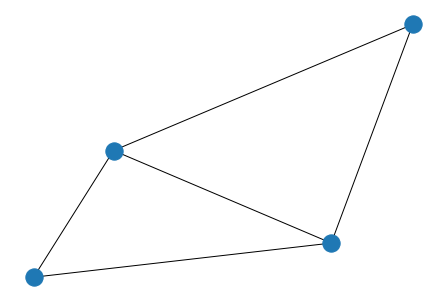

In [5]:
import networkx as nx
%matplotlib inline

G = nx.Graph()
nodes = ['a','b','c','d']

G.add_edge('a', 'b', weight=4)
G.add_edge('b', 'c', weight=1)
G.add_edge('c', 'd', weight=2)
G.add_edge('d', 'a', weight=5)
G.add_edge('b', 'd', weight=3)

nx.draw(G)

In [55]:
from heapq import heappush, heappop


def update_edges(node,edges,G,tree):
    for key,val in G[node].items():
        n, weight = key,val['weight']
        if G.nodes[n]['MST'] == False:
            heappush(edges,(weight,n))
    return edges


def MST(G,start):
    """
    
    - check every node and edges --> O(V+E)
    - at each of these, add to heap --> log(E)
    
    Time: O((V+E)logE), Space: O(V+E)
    
    """

    tree, edges, cost = [], [], 0
    
    #mark nodes
    for node in G.nodes():
        G.nodes[node]['MST'] = False
    
    #start node
    tree.append(start)
    G.nodes[start]['MST'] = True
    edges = update_edges(start,edges,G,tree)
    
    while len(tree) <= G.number_of_nodes() - 1:
        
        #print('tree = {}'.format(tree))
                    
        #select new node to add to MST
        min_weight, min_neighbour = heappop(edges)
        tree.append(min_neighbour)
        G.nodes[min_neighbour]['MST'] = True
        cost += min_weight
        node = min_neighbour
        
        #Add his edges to list
        edges = update_edges(node,edges,G,tree)
    
    return tree, cost

MST(G,'a')

(['a', 'b', 'c', 'd'], 7)

#### Kruskal's algorithm